# 1D DC Resistivity Inversion

In [1]:
from utils.DCResistivity import DC1DInversionApp
dc_app = DC1DInversionApp()

# Purpose

We load observed DC data, and invert to recover a resistivity model. By altering inversion parameters and exploring correspoding inversion results, we investigate important aspects of the 1D DC resistivity inversion. 

## Outline
This notebook includes four steps:
- Step1: Load observed data
- Step2: Plot observed data
- Step3: Set layer thicknesses
- Step4: Set uncertainty
- Step5: Run inversion
- Step6: Explore inversion results
- Step7: Run inversion to compute DOI index
- Step8: Plot DOI index

## Step 1: Load observed data

- `obsfile`: file name for the observed data
- `topofile`: file name for the topography data
- `load`: will load the observation file if this is checked
- `input type`: type of the input file

In [2]:
dc_app.interact_load_obs()

interactive(children=(Dropdown(description='filename: ', index=1, layout=Layout(width='max-content'), options=…

## Step 2: Plot observed data

- `plot type`: type of the data plot
- `aspect ratio`: aspect ratio for pseudo-section plot

In [3]:
dc_app.interact_plot_obs_data()

interactive(children=(ToggleButtons(description='plot type', options=('sounding', 'histogram'), value='soundin…

## Step 3: Set a layer thicknesses

- `dz_min`: minimum thickness of the lyaer
- `n_layer`: number of layers
- `factor`: geometric factor which we increase thickness with depth

In [5]:
dc_app.interact_set_mesh()

interactive(children=(FloatText(value=2.0, description='dz_min'), IntSlider(value=25, continuous_update=False,…

## Step 4: Set uncertainty

$$ \text{uncertainty} = 0.01 \times \text{percentage}\times|d^{obs}| + \text{floor}$$

- `percentage (%)`: percentage error
- `floor (ohm-m)`: floor error

In [6]:
dc_app.interact_set_uncertainty()

interactive(children=(FloatText(value=5.0, description='percentage'), FloatText(value=0.0, description='floor'…

## Step 5: Run inversion

- $\rho_0$: initial resistivity model
- $\rho_{ref}$: reference resistivity model
- `alpha_s`: $\alpha_s$
- `alpha_z`: $\alpha_z$
- `maxIter`: maximum number of iteration
- `chifact`: chifactor for the target misfit
- `beta0_ratio`: ratio to set the initial beta
- `coolingFactor`: cooling factor to cool beta
- `n_iter_per_beta`: # of interation for each beta value 
- `run`: run inversion if this is checked

In [7]:
dc_app.interact_run_inversion()

interactive(children=(FloatText(value=166.0, description='$\\rho_0$'), FloatText(value=166.0, description='$\\…

## Step 6: Explore inversion results

- `iteration`: inversion iteration
- `curve type`:type of the curve (this is active when `plot type`=`misfit_curve`)
- `scale`: linear or log scale (this is active when `plot type`=`misfit_curve`)
- `plot type`: type of the plot

interactive(children=(IntSlider(value=1, continuous_update=False, description='iteration', max=8, min=1), Togg…

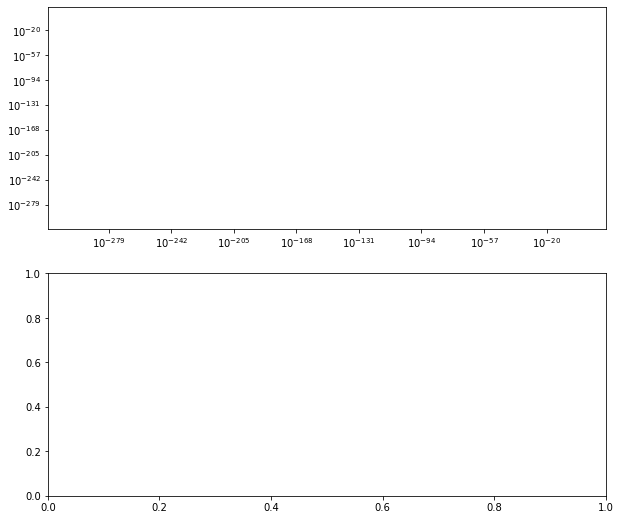

In [8]:
dc_app.interact_plot_inversion_results()

## Step 7: Run inversion to compute DOI index

Depth of investigation (DOI) index can be computed by following equation (Oldenburg and Li, 1999):

$$ \text{doi index} = \frac{m^1-m^2}{m_{ref}^1-m_{ref}^2}$$

where 

- $m^1$: inversion model 1 (from Step5)
- $m^2$: inversion model 2 (same inversion parameters with model 1 except for `m0` and `mref`
- $m_{ref}^1$: reference model 1 (used for Step 5)
- $m_{ref}^2$: reference model 2 (=$m_{ref}^1 \times$ factor)

Here a constant factor is multiplied to generate a new reference model. 
Below app will run inversion to obtain another inversion model ($m^2$), which will allow us to 
compute DOI index in the following app. 

### Parameters
- `factor`: constant factor to compute a new reference model
- `run`: if checked, then a new inverion will run

In [16]:
dc_app.interact_run_doi()

interactive(children=(FloatText(value=0.5, description='factor'), Checkbox(value=False, description='run'), Ou…

##  Step 8: Plot DOI index


- `doi_level`: level of the doi index

In [17]:
dc_app.interact_plot_doi_results()

interactive(children=(FloatText(value=75.0, description='$\\rho_{min}$'), FloatText(value=717.0, description='…